In [30]:
sample_01 = "/Users/troydo42/Desktop/Body_Matrixes/1241_Vinhomes_02"
sample_02 = "/Users/troydo42/Desktop/Body_Matrixes/1223_DaoTan_Pedestrians_02"

In [36]:
import os

def getFramesPath(sample_dir):
    frames = sorted(os.listdir(sample_dir+"/frames"))
    total_frames = len(frames)
    frames_path = ["" for x in range(total_frames)]
    # print(len(frames_path))
    for frame in frames:
        root_ext = os.path.splitext(frame)
        if root_ext[1] == '.png':
            frame_index = int(root_ext[0][0:-7])
            # print(frame_index)
            frames_path[frame_index] = os.path.join(sample_dir + "/frames/"+frame)
        
    return frames_path

In [37]:
sample_01_paths = getFramesPath(sample_01)
sample_02_paths = getFramesPath(sample_02)

In [38]:
print(len(sample_02_paths), len(sample_01_paths))

64 39


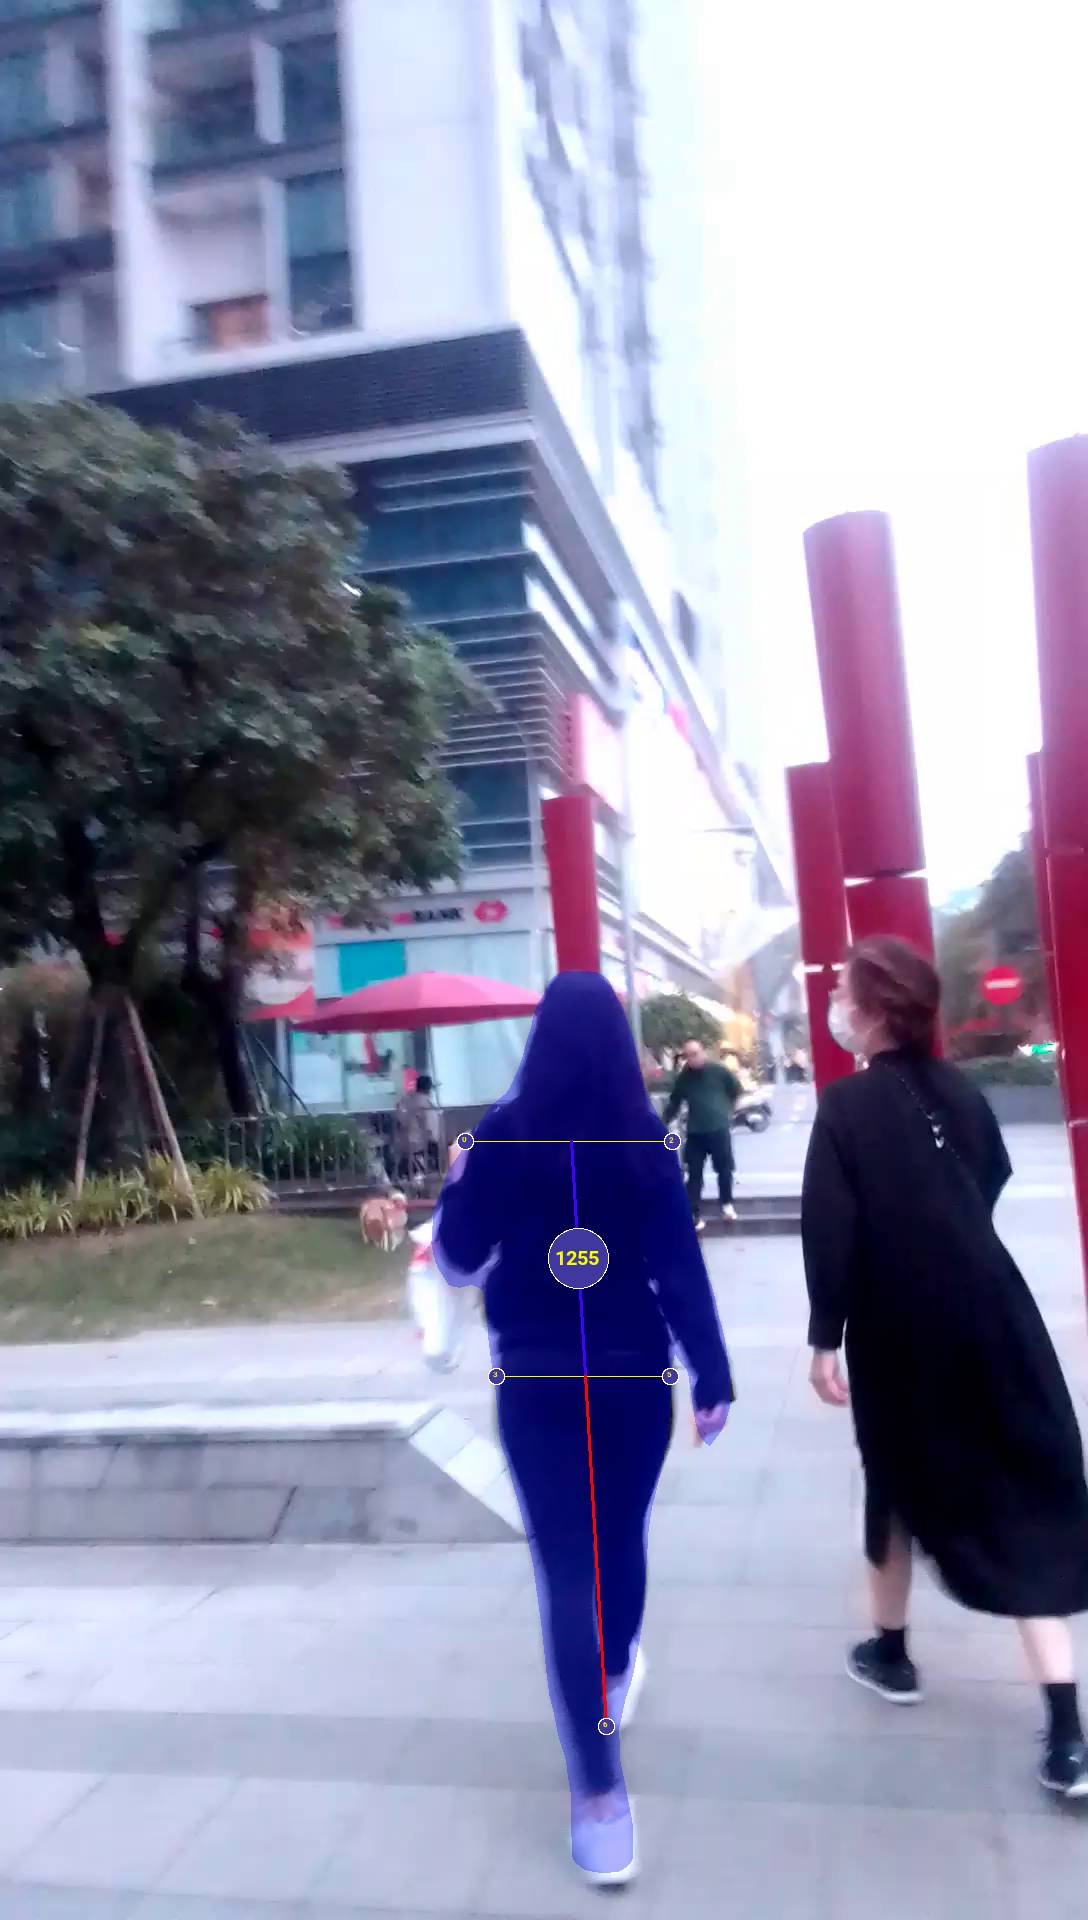

In [39]:
from PIL import Image

image01 = Image.open(sample_01_paths[0])
image01

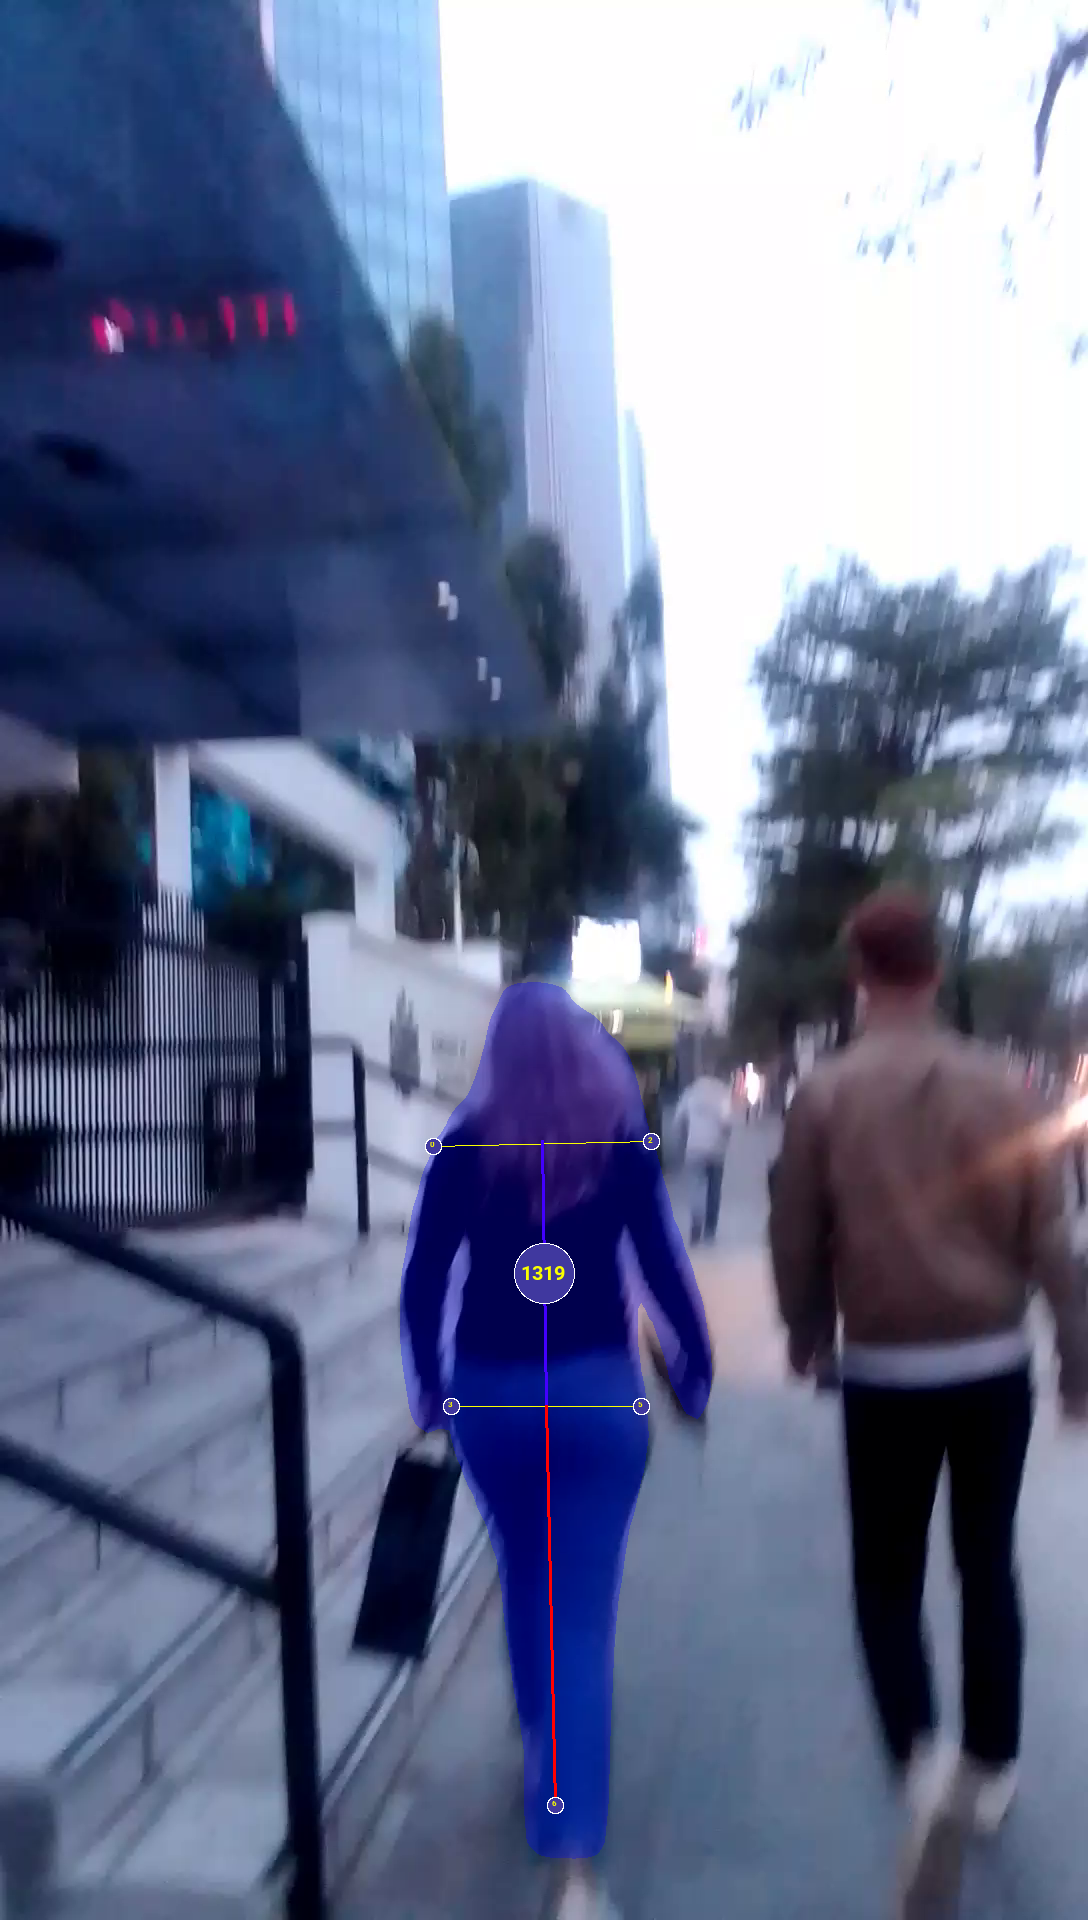

In [40]:
image02 = Image.open(sample_02_paths[0])
image02

In [45]:
from torchvision.transforms.functional import to_pil_image

def stitchPNG(png01, png02):
    # Open PNG Images
    left_image = Image.open(png01)
    right_image = Image.open(png02)
    
    # Create the Extended Video Frame
    width = left_image.width + right_image.width
    height = left_image.height
    new_frame = Image.new("RGB", (width, height))

    # Paste Two Frame into one Larger Frame
    new_frame.paste(im=left_image, box=(0,0))
    new_frame.paste(im=right_image, box=(left_image.width,0))
    return new_frame

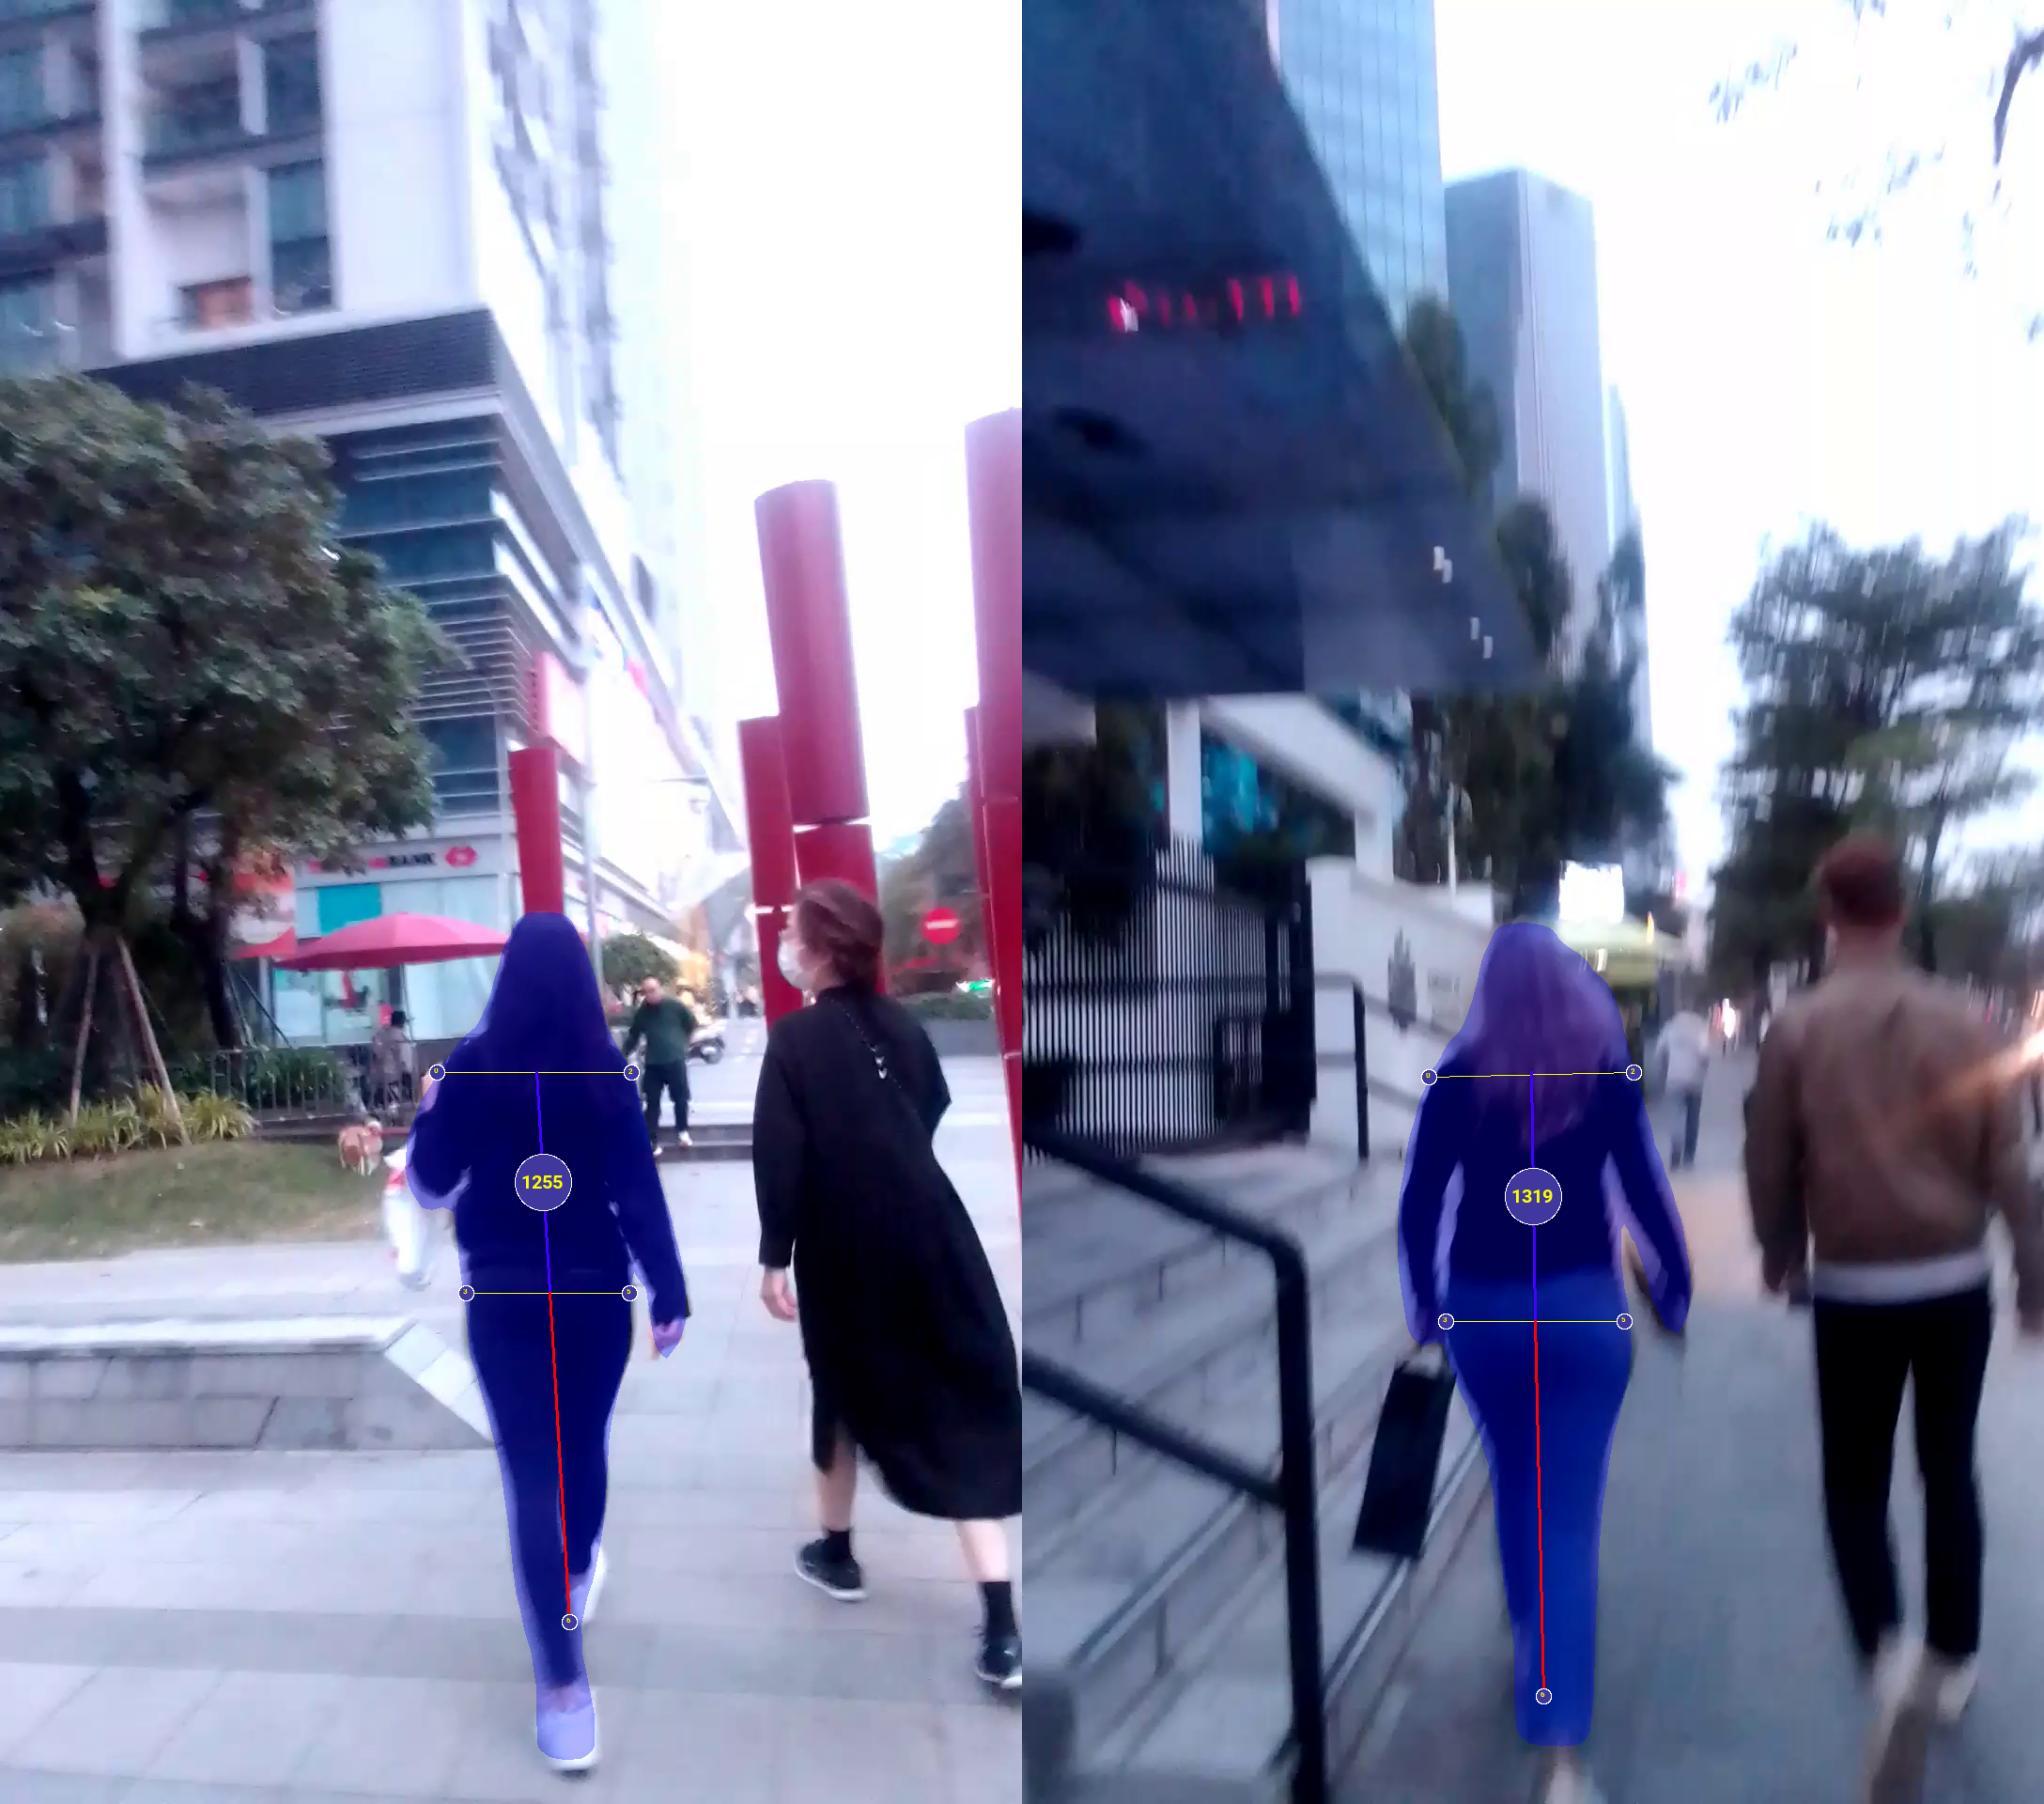

In [46]:
combined_images = stitchPNG(sample_01_paths[0], sample_02_paths[0])
combined_images

In [48]:
total_frames = len(sample_01_paths) + len(sample_02_paths)
for idx in range(total_frames):
    print(idx)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102


In [78]:
def generate_combined_vids(left_target_index, right_target_index, left_dir, right_dir, fps, width, height):
    left_frames_count = len(left_dir) + left_target_index 
    right_frames_count = len(right_dir) + right_target_index 
    total_frames = left_frames_count + right_frames_count
    
    container = av.open("combined_vid.mp4", mode="w")
    container = av.open("new.mp4", mode="w")

    ### Add mp4 stream to container with fps, width and height
    stream = container.add_stream("mpeg4", rate=math.floor(fps))
    stream.width = width
    stream.height = height
    
    ### Write Encode function to Encode frame into Mpeg4 format
    def encode(image):
        frame = av.VideoFrame.from_image(image)
        for packet in stream.encode(frame):
            container.mux(packet)
            
    for idx in range(total_frames):
        if idx < left_frames_count:
            if idx > len(left_dir) - 1 :
                print(idx, len(left_dir) - idx - 1)
                combined_frame = stitchPNG(left_dir[len(left_dir) - idx -1 ], right_dir[0])
                slow_motion_frames = [combined_frame] * 6
                for frame in slow_motion_frames:
                    encode(frame)
            else:
                print(idx)
                combined_frame = stitchPNG(left_dir[idx], right_dir[0])
                encode(combined_frame)
                
        else:
            if idx > left_frames_count + len(right_dir) - 1:
                print(idx, left_frames_count + len(right_dir) - idx - 1)
                combined_frame = stitchPNG(left_dir[len(left_dir) - left_frames_count -1], right_dir[left_frames_count + len(right_dir) - idx - 1])
                slow_motion_frames = [combined_frame] * 6
                for frame in slow_motion_frames:
                    encode(frame)
            else:
                print(idx)
                combined_frame = stitchPNG(left_dir[len(left_dir) - left_frames_count -1], right_dir[idx - left_frames_count])
                encode(combined_frame)
            
    ### Close Container
    container.close()

In [80]:
import av
import math

generate_combined_vids(12, 35, sample_01_paths, sample_02_paths, 30, combined_images.width, combined_images.height)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39 -1
40 -2
41 -3
42 -4
43 -5
44 -6
45 -7
46 -8
47 -9
48 -10
49 -11
50 -12
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115 -1
116 -2
117 -3
118 -4
119 -5
120 -6
121 -7
122 -8
123 -9
124 -10
125 -11
126 -12
127 -13
128 -14
129 -15
130 -16
131 -17
132 -18
133 -19
134 -20
135 -21
136 -22
137 -23
138 -24
139 -25
140 -26
141 -27
142 -28
143 -29
144 -30
145 -31
146 -32
147 -33
148 -34
149 -35
